In [2]:
import tensorflow as tf
import requests
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import urllib.request
import numpy as np
from skimage import io

In [3]:
model_path = "Model_Data/model_24/"
new_model = tf.keras.models.load_model(model_path+'model_24.h5')
IMG_SIZE = 150

In [4]:
def digits_to_names(wrinkles,freckles,glasses,colour,top):
    if (wrinkles == 0):
        wrinkle = "Does not have wrinkles. "
    else:
        wrinkle = "Has wrinkles. "
    if (freckles == 0):
        freckle = "Does not have freckles. "
    else:
        freckle = "Has freckles. "
    if(glasses == 0):
        glass = "Does not have glasses. "
    elif(glasses == 1):
        glass = "Has normal glasses. "
    else:
        glass = "Has sunglasses. "
    if(colour == 0):
        hair_color = "Brown. "
    elif(colour == 1):  
        hair_color = "Black. "
    elif(colour == 2):  
        hair_color = "Grey. "
    elif(colour == 3):  
        hair_color = "Blonde. "
    elif(colour == 4):  
        hair_color = "Red. "
    elif(colour == 5):  
        hair_color = "White. "
    elif(colour == 6):  
        hair_color = "Other. "
    else:  
        hair_color = "Not visible. "
    if (top == 0 ):
        hair_top = "Bald or shaved. "
    elif(top == 1):
        hair_top = "Has few hair. "
    elif(top == 2):
        hair_top = "Has thick hair. "
    else:
        hair_top = "Not visible."
    prediction_string = wrinkle + freckle + glass + hair_color + hair_top
    return prediction_string

In [5]:
urls = [
    "https://d2h3d42vkj4fuu.cloudfront.net/acce157c9581f2a9f4259dea91f79817",
    "https://images.squarespace-cdn.com/content/v1/52d2ebb3e4b06f22d60562c5/1496123575277-LXUXXVLSL1263M40YLJK/ke17ZwdGBToddI8pDm48kGimpnGS74lOCXEVScmdKfQUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8GRo6ASst2s6pLvNAu_PZdJblJnDTNjTASBy3WMly_ic7RFeFNz6WHDDme815vyzW9AukLhYm2lpbtr2HKmuE68/Adam+Jacobs+Famous+Faces-7.jpg",
    "https://ichef.bbci.co.uk/news/624/media/images/75509000/jpg/_75509688_maggie_pa.jpg",
    "https://www.styleinterest.com/wp-content/uploads/2018/07/5556-Strawberry-Blonde.jpg",
    "https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/k-s48-ake-fon-4212123bw.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=3c460bfa579b51cc862450a9356d3fb8",
    "https://image.kpopmap.com/2019/08/EChP3GDXoAEuD4d.jpg",
    "https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F14%2F2011%2F03%2F21%2F031711-January-400_1.jpg"
]

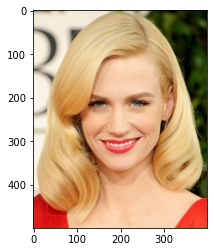

In [32]:
url = urls[6]
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


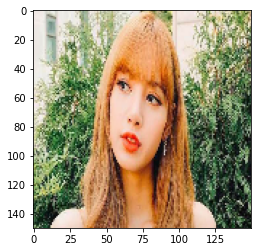

In [29]:
img_array = np.asarray(img) # puts image into an array
resized = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # resize the image, first arguement is the image to resize, second argument is the size to go to
plt.imshow(resized) # view the image that has been converted
#normalise image
image = resized / 255
image = image.reshape(1, IMG_SIZE,IMG_SIZE,3)

In [30]:
prediction = (new_model.predict(image) ) # feed image into the network
output_string = digits_to_names(np.argmax(prediction[0]),np.argmax(prediction[1]),np.argmax(prediction[2]),np.argmax(prediction[3]),np.argmax(prediction[4]))
#print("Predicted digit:", str(np.argmax(prediction[0])))
print(output_string)

Has wrinkles. Has freckles. Has sunglasses. Not visible. Has few hair. 


In [21]:
print(prediction)
print(np.argmax(prediction[0]),np.argmax(prediction[1]),np.argmax(prediction[2]),np.argmax(prediction[3]),np.argmax(prediction[4]))

[array([[0.7163316 , 0.28366837]], dtype=float32), array([[0.51045245, 0.48954752]], dtype=float32), array([[0.29468814, 0.11431745, 0.5909944 ]], dtype=float32), array([[0.15190342, 0.11633673, 0.05218978, 0.12334009, 0.11846849,
        0.04475965, 0.18277197, 0.03697762, 0.17325224]], dtype=float32), array([[0.03790282, 0.33324286, 0.28087786, 0.34797648]], dtype=float32)]
0 0 2 6 3
